## 1- Load file

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df_covid = pd.read_csv('large_data.csv')  # Replace 'your_dataset.csv' with the actual file path or name

# Display the first few rows to verify the data was loaded correctly
print(df_covid.head())

   COUGH  MUSCLE_ACHES  TIREDNESS  SORE_THROAT  RUNNY_NOSE  STUFFY_NOSE  \
0      0             0          1            0           1            0   
1      0             0          1            0           0            0   
2      0             1          1            1           0            0   
3      0             0          0            1           1            0   
4      0             0          1            0           1            0   

   FEVER  NAUSEA  VOMITING  DIARRHEA  ...  DIFFICULTY_BREATHING  \
0      0       0         0         0  ...                     0   
1      0       0         0         0  ...                     0   
2      0       0         0         0  ...                     0   
3      0       0         0         0  ...                     0   
4      0       0         0         0  ...                     0   

   LOSS_OF_TASTE  LOSS_OF_SMELL  ITCHY_NOSE  ITCHY_EYES  ITCHY_MOUTH  \
0              1              0           1           0            0   
1 

## 2- Missing value check

### isNull

In [5]:
# Check for missing values in each column
missing_values = df_covid.isnull().sum()

# Display columns with missing values, if any
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Alternatively, show a summary if missing values exist
if missing_values.sum() > 0:
    print(f"\nTotal number of missing values: {missing_values.sum()}")
else:
    print("\nNo missing values found in the dataset.")


Missing values in each column:
Series([], dtype: int64)

No missing values found in the dataset.


### Illegal value check (anything except 0/1) 

In [7]:
# Check for unique values in each feature column
illegal_values = df_covid.iloc[:, :-1].apply(lambda col: col.isin([0, 1]).all())

# Display columns that contain illegal values
invalid_columns = illegal_values[illegal_values == False]

if not invalid_columns.empty:
    print("Columns with illegal values (values other than 0 or 1):")
    print(invalid_columns.index.tolist())
    
    # Optionally, show the count of illegal values in these columns
    for col in invalid_columns.index:
        print(f"\nIllegal value count in '{col}':")
        print(df_covid[col][~df_covid[col].isin([0, 1])].value_counts())
else:
    print("No illegal values found in the feature columns.")


No illegal values found in the feature columns.


## 3- Statistics

### Summary by Pandas

In [8]:
# Summary statistics
df_covid.describe()

# Quartiles can be interesting here

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Symptom occurance count

In [10]:
# Sum of all columns
sum_all_columns = df_covid.sum()

print("Sum of all columns:")
print(sum_all_columns)

Sum of all columns:
COUGH                                                               23145
MUSCLE_ACHES                                                        23105
TIREDNESS                                                           23111
SORE_THROAT                                                         23087
RUNNY_NOSE                                                          22059
STUFFY_NOSE                                                         22042
FEVER                                                               14465
NAUSEA                                                              14414
VOMITING                                                            14426
DIARRHEA                                                            14379
SHORTNESS_OF_BREATH                                                 14398
DIFFICULTY_BREATHING                                                14423
LOSS_OF_TASTE                                                       18803
LOSS_OF_SMELL     

### Symptom occurance frequency

In [12]:
# Total number of rows in the DataFrame
df_feat = df_covid.iloc[:, :-1]

total_rows = len(df_feat)

# Calculate the ratio of 1s in each column
ratios = df_feat.sum() / total_rows

print("Ratio of 1s in each column:")
print(ratios)

Ratio of 1s in each column:
COUGH                   0.520662
MUSCLE_ACHES            0.519762
TIREDNESS               0.519897
SORE_THROAT             0.519358
RUNNY_NOSE              0.496232
STUFFY_NOSE             0.495850
FEVER                   0.325400
NAUSEA                  0.324253
VOMITING                0.324523
DIARRHEA                0.323465
SHORTNESS_OF_BREATH     0.323893
DIFFICULTY_BREATHING    0.324455
LOSS_OF_TASTE           0.422986
LOSS_OF_SMELL           0.423234
ITCHY_NOSE              0.184285
ITCHY_EYES              0.184285
ITCHY_MOUTH             0.184285
ITCHY_INNER_EAR         0.184285
SNEEZING                0.519313
PINK_EYE                0.184240
dtype: float64


### Class distribution

In [15]:
# Replace 'column_name' with the name of the column you want to analyze
class_counts = df_covid['TYPE'].value_counts()

print(f"Counts of classes:")
print(class_counts)

Counts of classes:
FLU        25000
ALLERGY    16381
COVID       2048
COLD        1024
Name: TYPE, dtype: int64


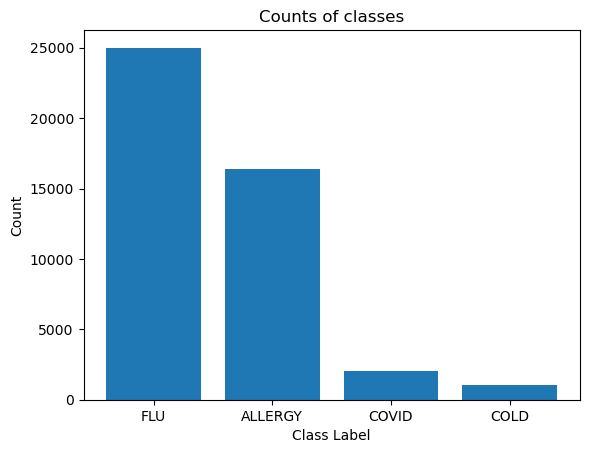

In [31]:
# Create a bar chart
plt.figure()
plt.bar(class_counts.index, class_counts.values)

# Add labels and title
plt.title("Counts of classes")
plt.xlabel('Class Label')
plt.ylabel('Count')

# Show the plot
plt.show()

...so there is quite a class imbalance 

## 4- Correlation with class label

### Countplot

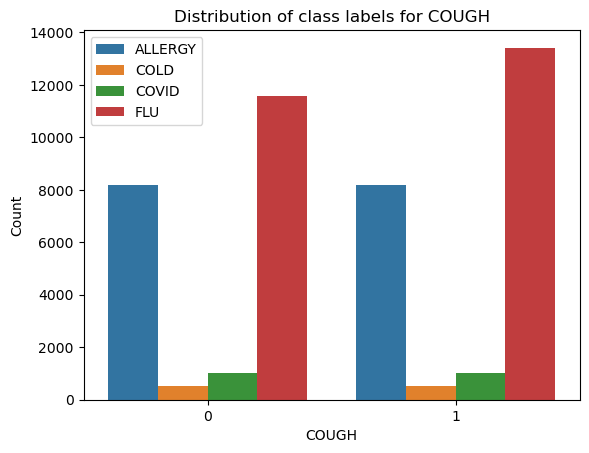

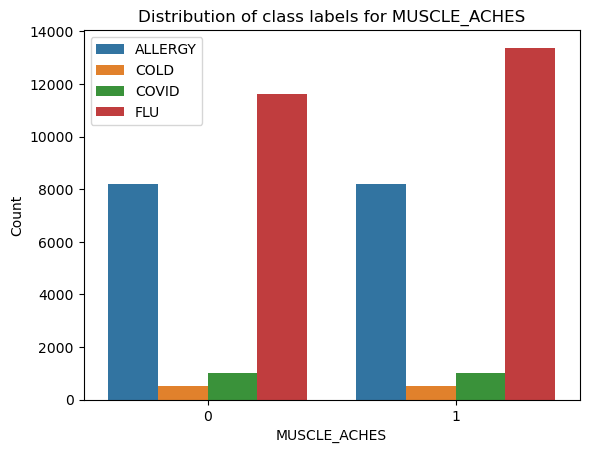

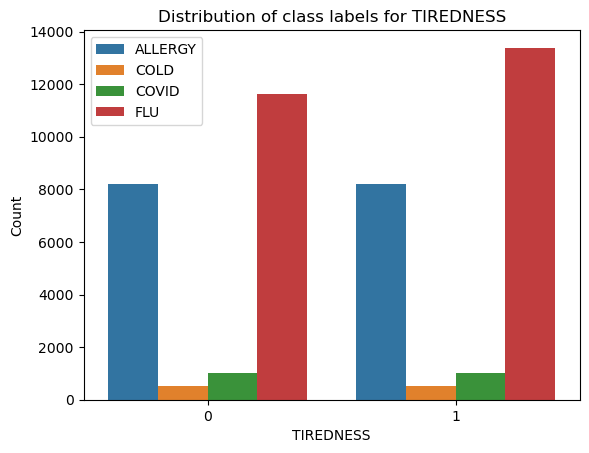

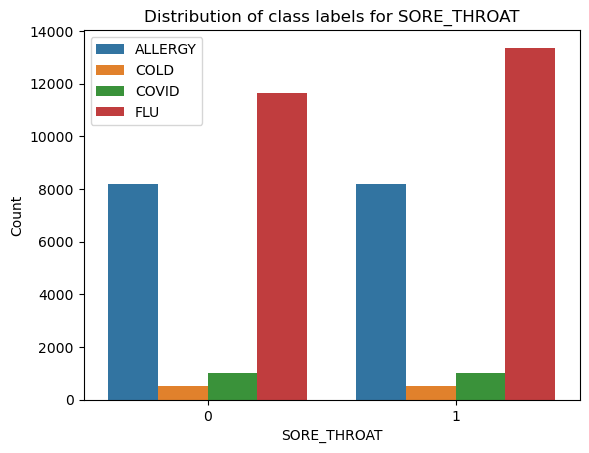

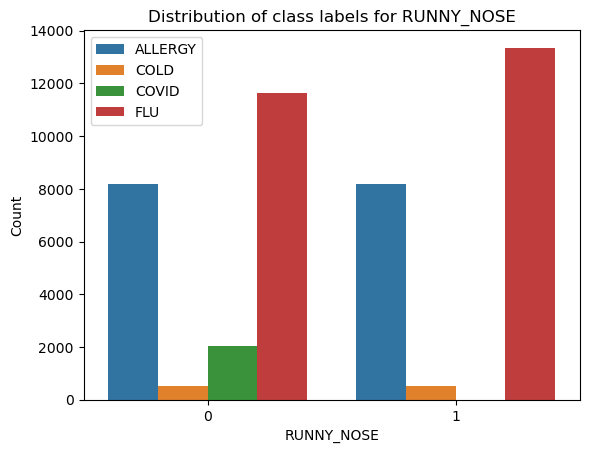

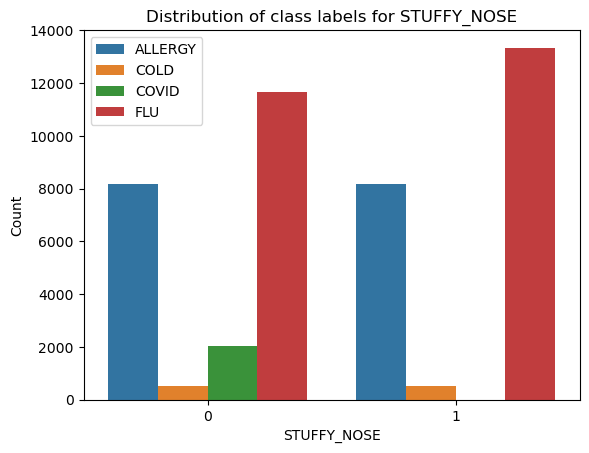

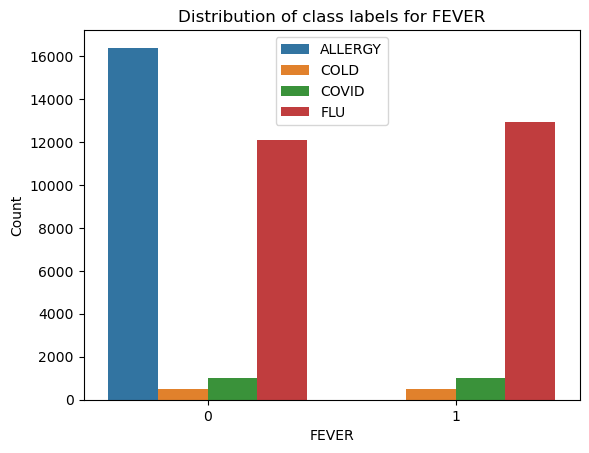

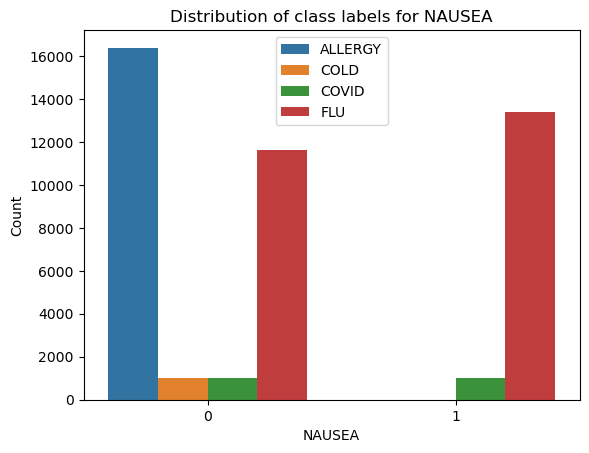

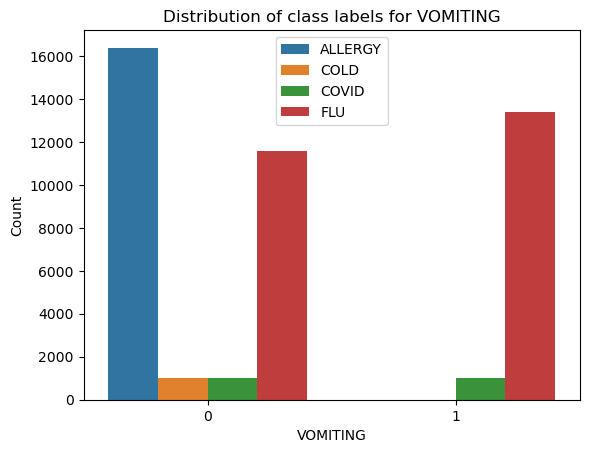

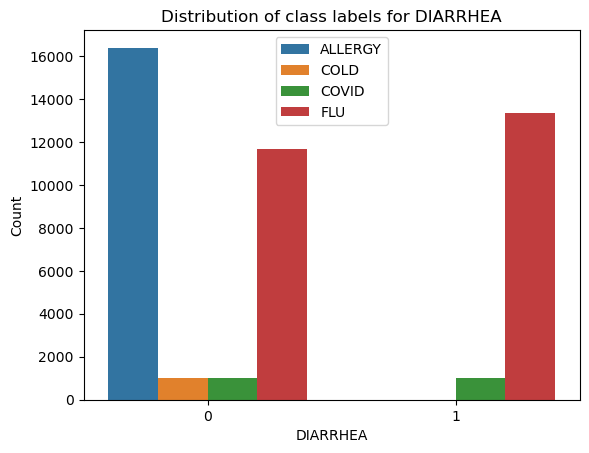

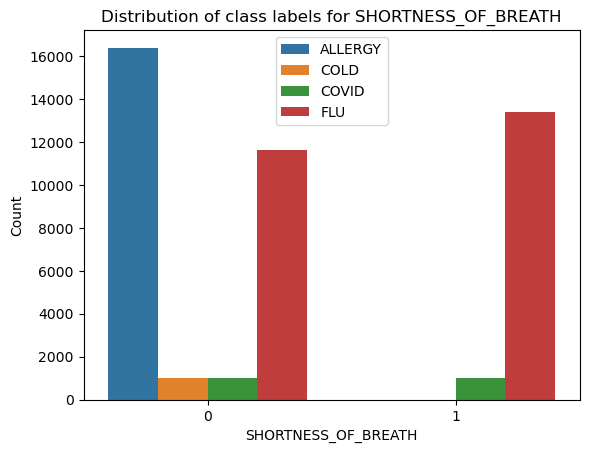

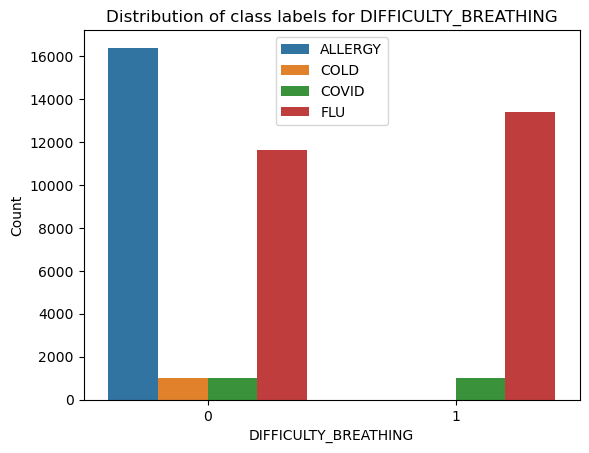

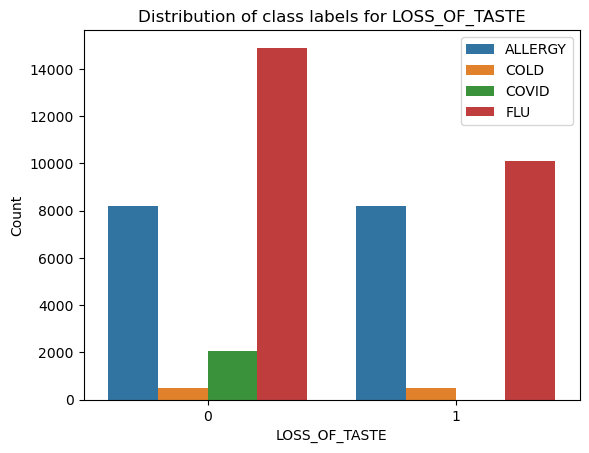

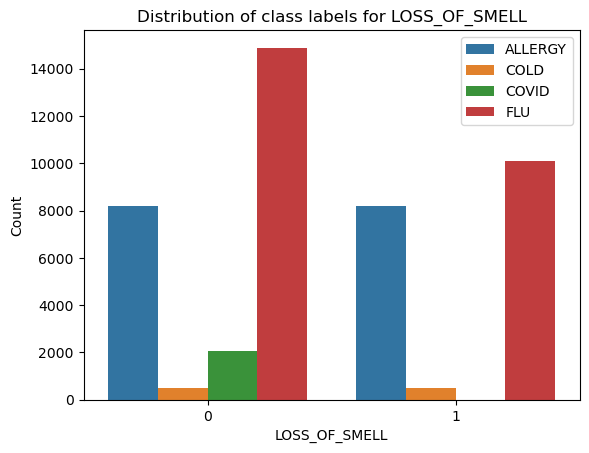

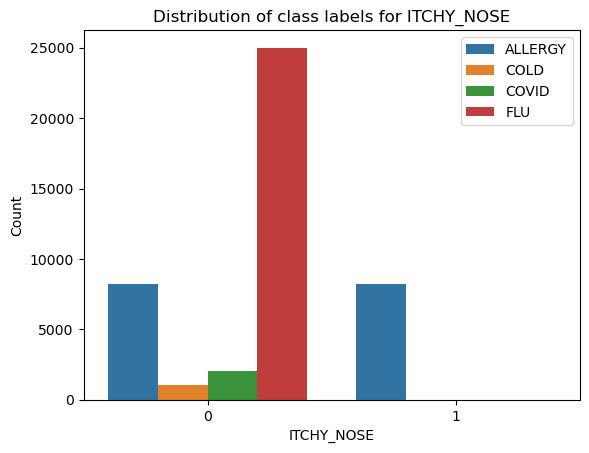

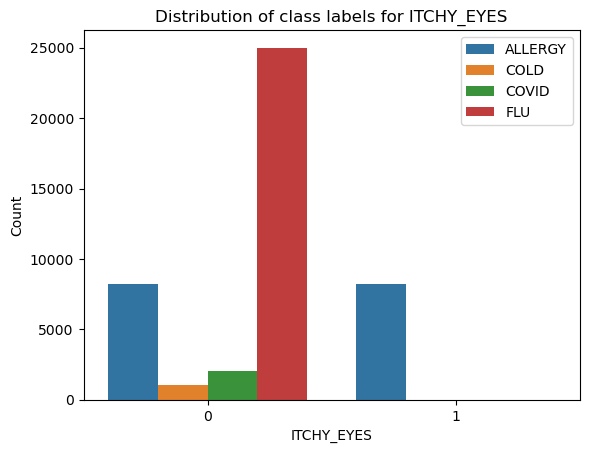

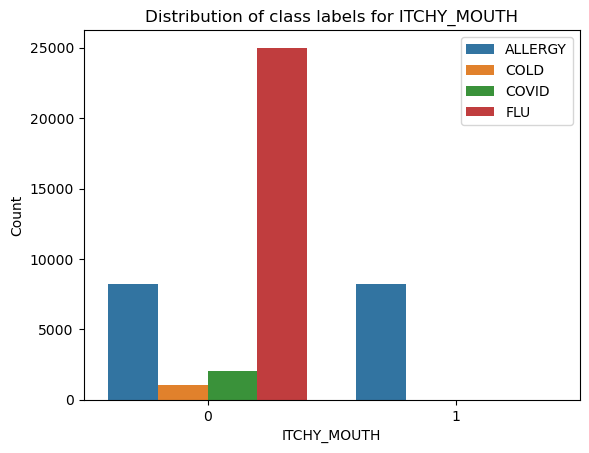

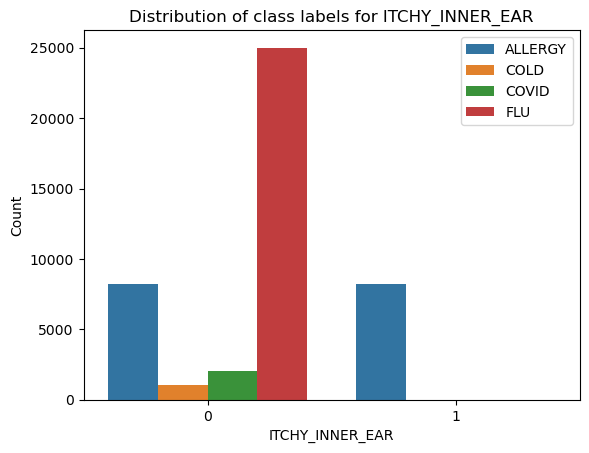

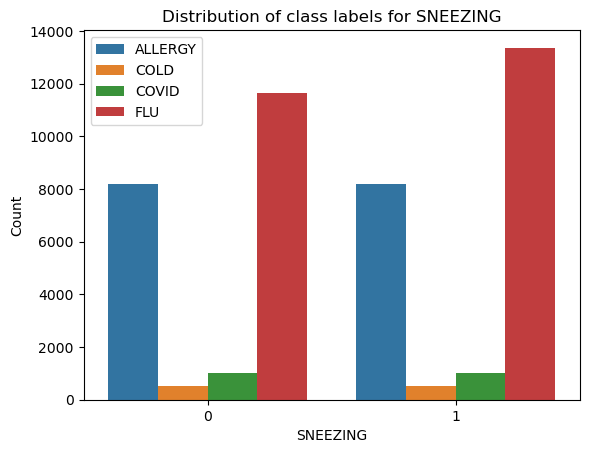

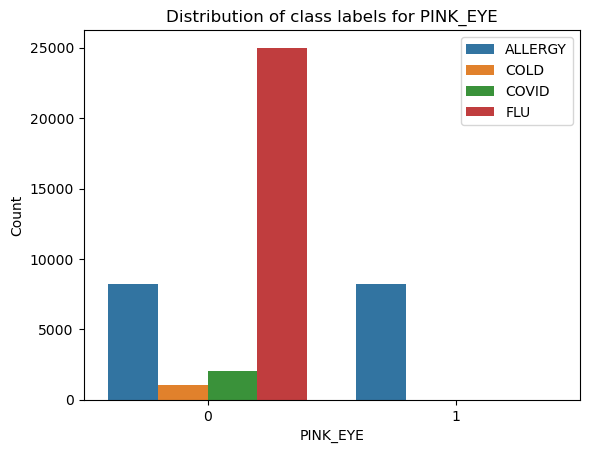

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for feat in df_covid.iloc[:, :-1].columns.tolist():
    
    # Plot the distribution of class labels for a specific binary feature

    plt.figure()
    sns.countplot(data=df_covid, x=feat, hue='TYPE')
    plt.title(f'Distribution of class labels for {feat}')
    plt.xlabel(f'{feat}')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

### Countplot but relative frequencies

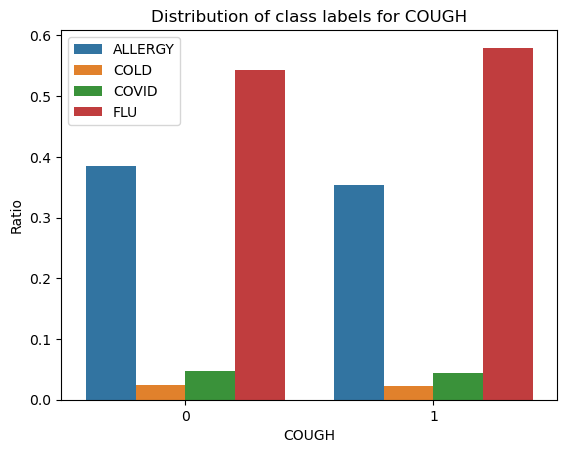

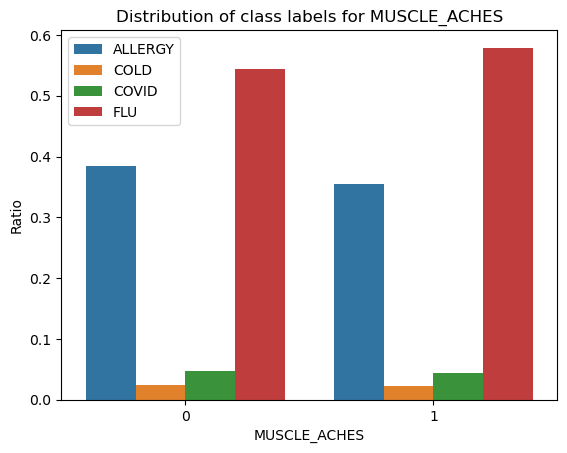

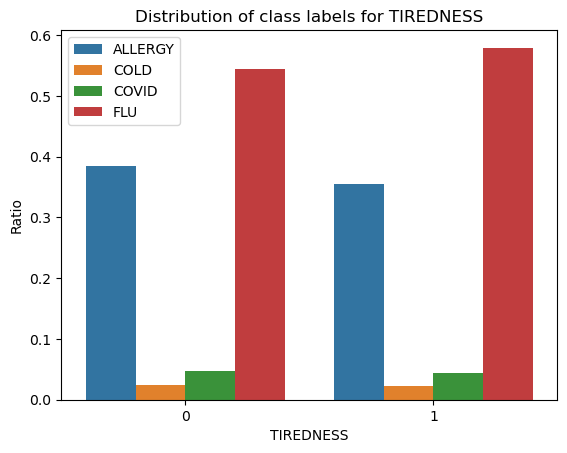

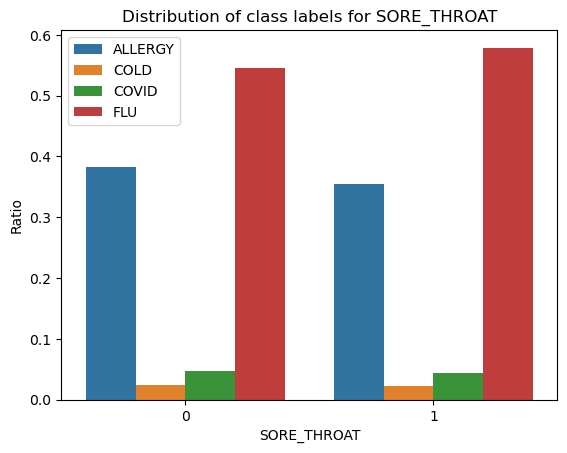

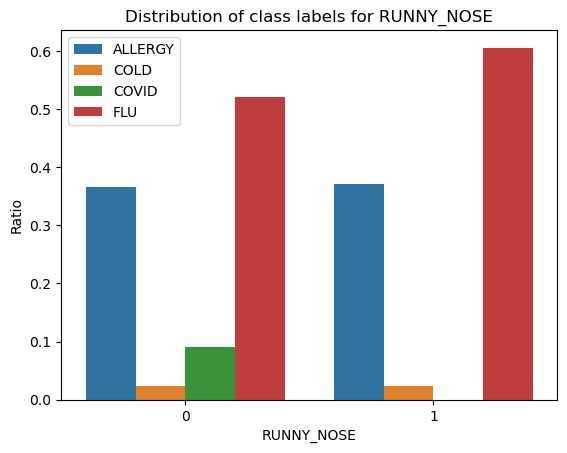

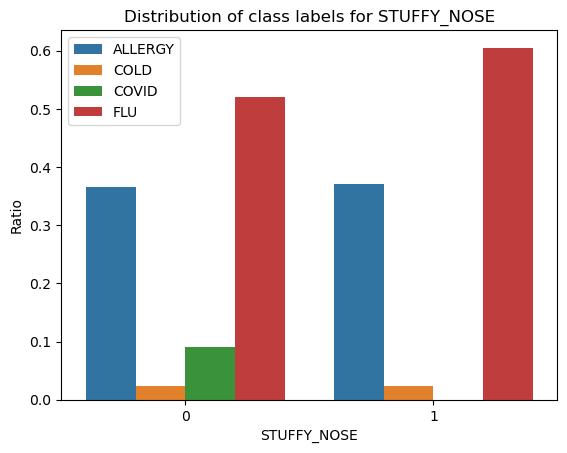

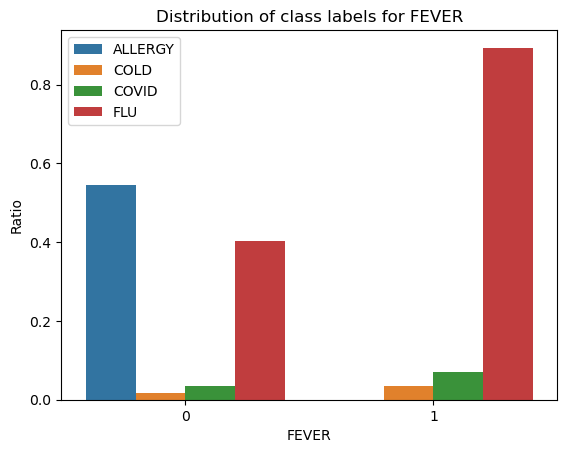

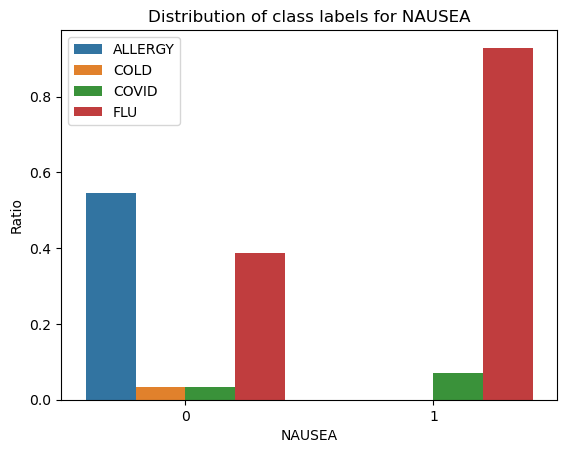

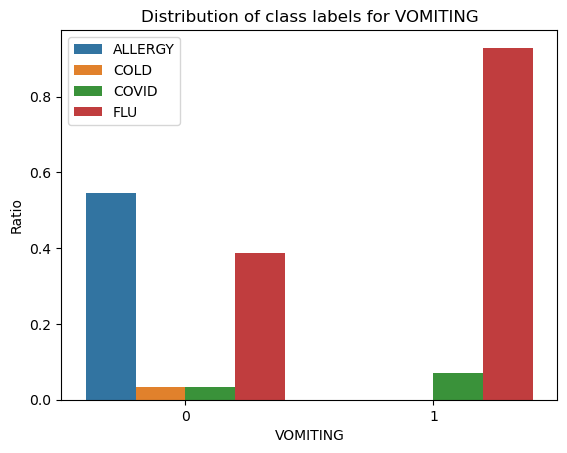

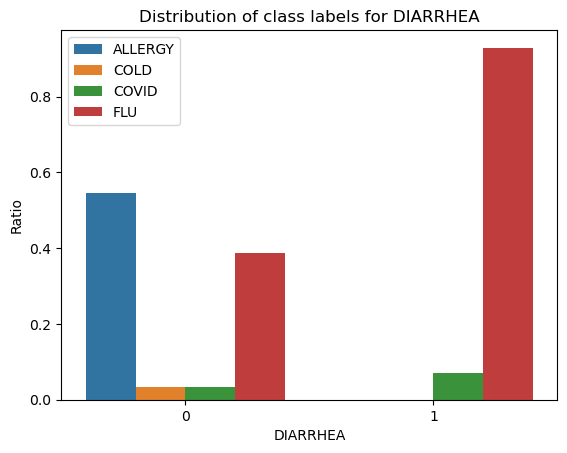

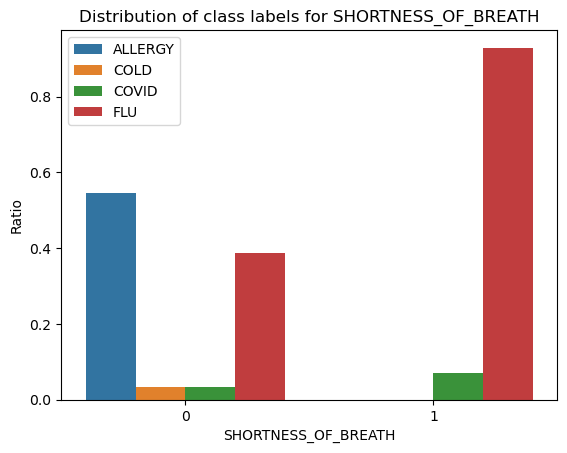

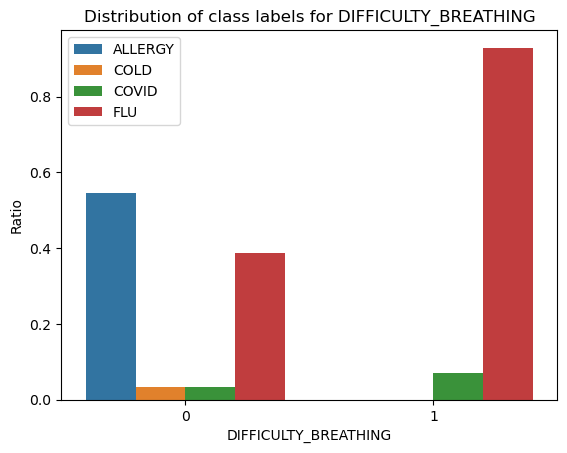

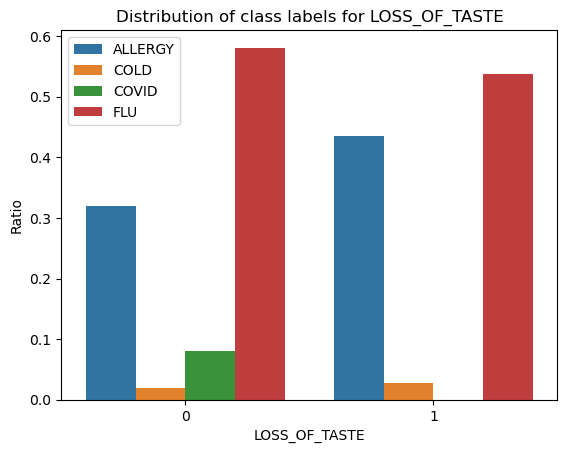

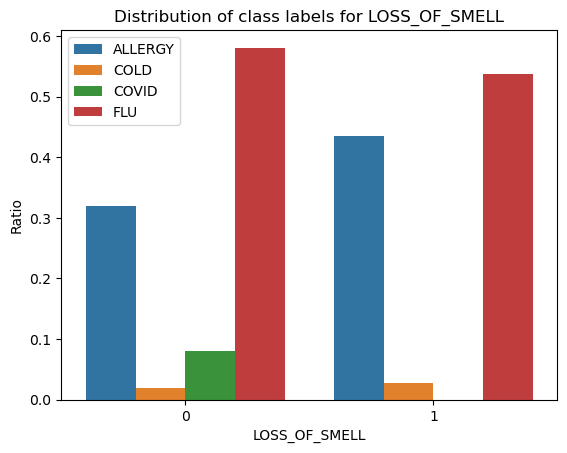

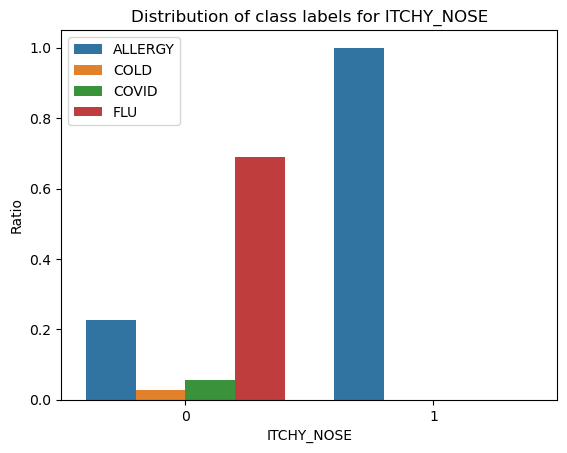

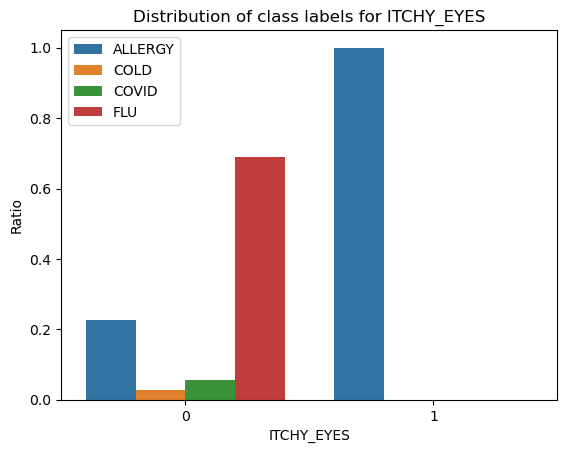

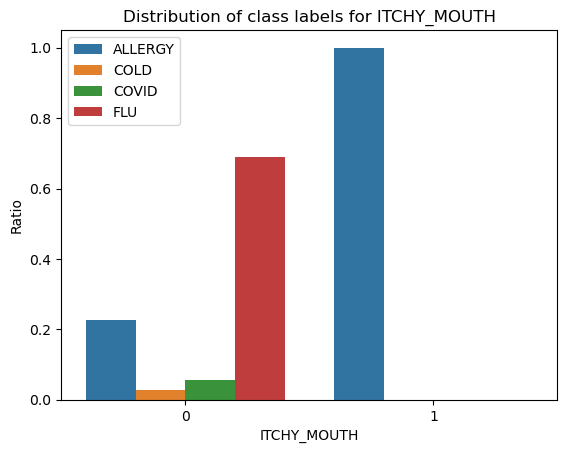

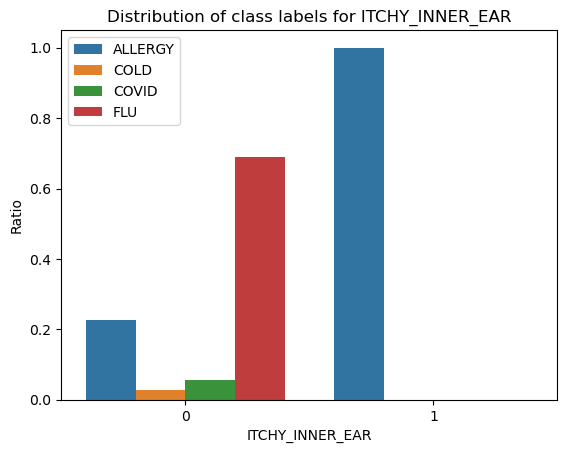

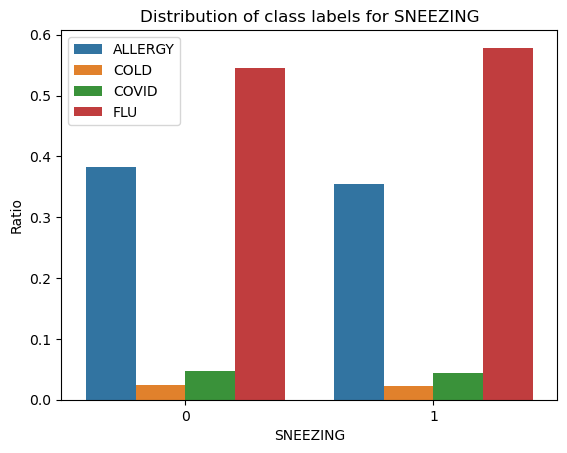

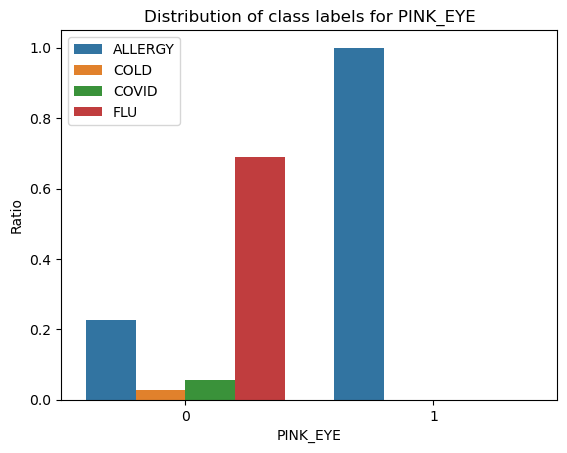

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each binary feature (excluding the last column if it is the target)
for feat in df_covid.iloc[:, :-1].columns.tolist():
    
    # Calculate the total count for each feature value
    feature_counts = df_covid.groupby([feat, 'TYPE']).size().reset_index(name='count')
    
    # Calculate the ratios by dividing the count by the total counts per feature value
    feature_counts['ratio'] = feature_counts.groupby(feat)['count'].transform(lambda x: x / x.sum())
    
    # Plot the distribution of ratios
    plt.figure()
    sns.barplot(data=feature_counts, x=feat, y='ratio', hue='TYPE')
    plt.title(f'Distribution of class labels for {feat}')
    plt.xlabel(f'{feat}')
    plt.ylabel('Ratio')
    plt.legend()
    plt.show()


###  Chi-Square Test for Independence

In [3]:
import pandas as pd
from scipy.stats import chi2_contingency

# Store results in a dictionary for easy access later
chi2_results = {}

for feature in df_covid.columns[:-1]:  # Exclude the label column if it's the last one
    # Create a contingency table for the feature vs. the label
    contingency_table = pd.crosstab(df_covid[feature], df_covid['TYPE'])
    
    print(contingency_table)
    
    # Perform the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the result
    chi2_results[feature] = {'chi2_stat': chi2, 'p_value': p}

# Convert results to a DataFrame for easier visualization
chi2_df = pd.DataFrame(chi2_results).T  # Transpose for readability
print(chi2_df)


TYPE   ALLERGY  COLD  COVID    FLU
COUGH                             
0         8190   512   1024  11582
1         8191   512   1024  13418
TYPE          ALLERGY  COLD  COVID    FLU
MUSCLE_ACHES                             
0                8190   512   1024  11622
1                8191   512   1024  13378
TYPE       ALLERGY  COLD  COVID    FLU
TIREDNESS                             
0             8191   512   1024  11615
1             8190   512   1024  13385
TYPE         ALLERGY  COLD  COVID    FLU
SORE_THROAT                             
0               8192   512   1024  11638
1               8189   512   1024  13362
TYPE        ALLERGY  COLD  COVID    FLU
RUNNY_NOSE                             
0              8189   512   2048  11645
1              8192   512      0  13355
TYPE         ALLERGY  COLD  COVID    FLU
STUFFY_NOSE                             
0               8189   512   2048  11662
1               8192   512      0  13338
TYPE   ALLERGY  COLD  COVID    FLU
FEVER        

#### Interpreting the Results
- Chi-square Statistic: Higher values suggest a stronger association.
- P-value: If the p-value is below your significance threshold (e.g., 0.05), it suggests the feature is significantly related to the label, which might make it valuable for your classification task.

### Mutual Information

Mutual Information (MI) is a measure of dependency between two variables. It quantifies the amount of information gained about one variable through the knowledge of another. For your dataset, MI can reveal how much information each binary feature provides about the categorical label, helping identify features that are most relevant for your classification task.

In [4]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Calculate mutual information between each binary feature and the label
X = df_covid.iloc[:, :-1]  # Features (all columns except the label)
y = df_covid['TYPE']  # Label column

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Organize scores into a DataFrame for easy reading
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)


                 Feature  Mutual Information
17       ITCHY_INNER_EAR            0.222403
16           ITCHY_MOUTH            0.222403
15            ITCHY_EYES            0.222403
14            ITCHY_NOSE            0.222403
19              PINK_EYE            0.222336
8               VOMITING            0.209943
11  DIFFICULTY_BREATHING            0.209883
7                 NAUSEA            0.209706
10   SHORTNESS_OF_BREATH            0.209390
9               DIARRHEA            0.209016
6                  FEVER            0.193483
4             RUNNY_NOSE            0.033222
5            STUFFY_NOSE            0.033164
12         LOSS_OF_TASTE            0.030455
13         LOSS_OF_SMELL            0.030427
0                  COUGH            0.000664
2              TIREDNESS            0.000619
1           MUSCLE_ACHES            0.000607
3            SORE_THROAT            0.000589
18              SNEEZING            0.000580


#### Interpreting Mutual Information Scores
- Higher Scores: A higher MI score for a feature suggests it’s more informative about the label.
- Low or Zero Scores: Features with very low or zero MI scores provide little to no information about the label and could potentially be dropped.

## 5- Correlation among features

### Cramer's V (more proper for categorical data) 

In [39]:
# 0 --> no association
# 1 --> strong association

'''
0.1 or lower: Weak association.
0.1 to 0.3: Moderate association.
Above 0.3: Strong association.
'''

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum().sum()  # Total sample size
    k = min(contingency_table.shape) - 1  # Smaller dimension minus 1
    return np.sqrt(chi2 / (n * k))

df = df_covid.iloc[:, :-1]

# Create an empty DataFrame to store the Cramér's V values
cramers_v_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculate Cramér's V for each pair of features
for col1 in df.columns:
    for col2 in df.columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Perfect association with itself
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert values to float for better display
cramers_v_matrix = cramers_v_matrix.astype(float)

print("Cramér's V Matrix:")
print(cramers_v_matrix)


Cramér's V Matrix:
                         COUGH  MUSCLE_ACHES  TIREDNESS  SORE_THROAT  \
COUGH                 1.000000      0.006706   0.006086     0.006312   
MUSCLE_ACHES          0.006706      1.000000   0.005834     0.005070   
TIREDNESS             0.006086      0.005834   1.000000     0.007333   
SORE_THROAT           0.006312      0.005070   0.007333     1.000000   
RUNNY_NOSE            0.004034      0.004858   0.003415     0.003783   
STUFFY_NOSE           0.005218      0.004692   0.004240     0.004699   
FEVER                 0.013179      0.013371   0.012223     0.012108   
NAUSEA                0.011609      0.009296   0.008724     0.007837   
VOMITING              0.010043      0.011003   0.009950     0.009641   
DIARRHEA              0.011637      0.009224   0.011155     0.008148   
SHORTNESS_OF_BREATH   0.011163      0.010869   0.012222     0.010852   
DIFFICULTY_BREATHING  0.009617      0.005767   0.009908     0.008829   
LOSS_OF_TASTE         0.023925      0.020088 

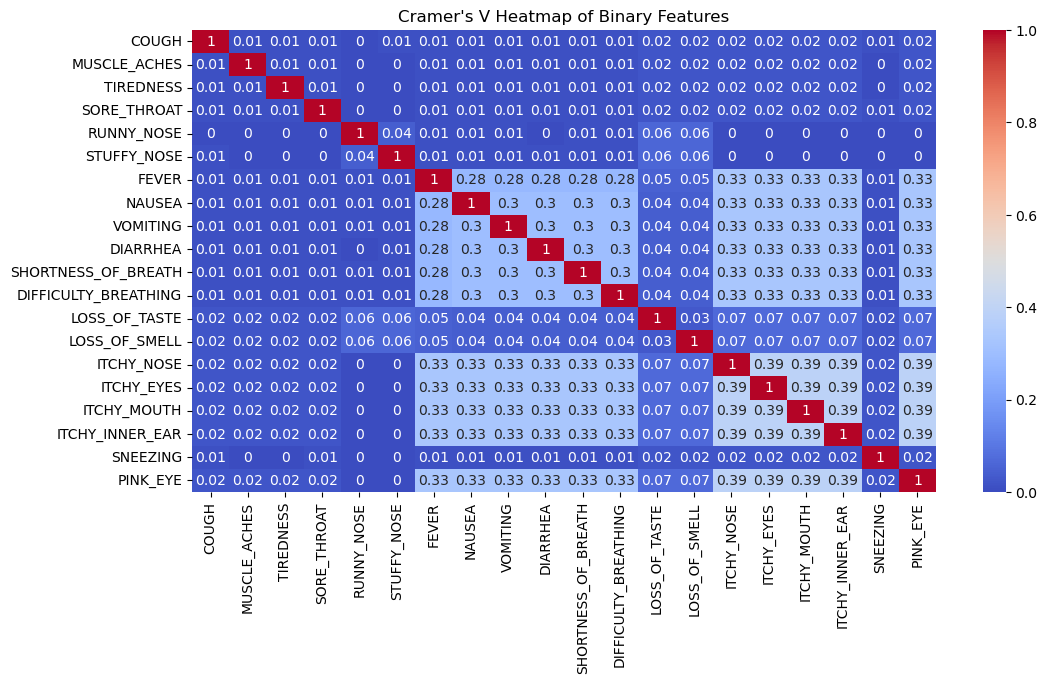

In [41]:
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cramers_v_matrix.round(2), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cramer's V Heatmap of Binary Features")
plt.show()

### Covariance Matrix and Heatmap

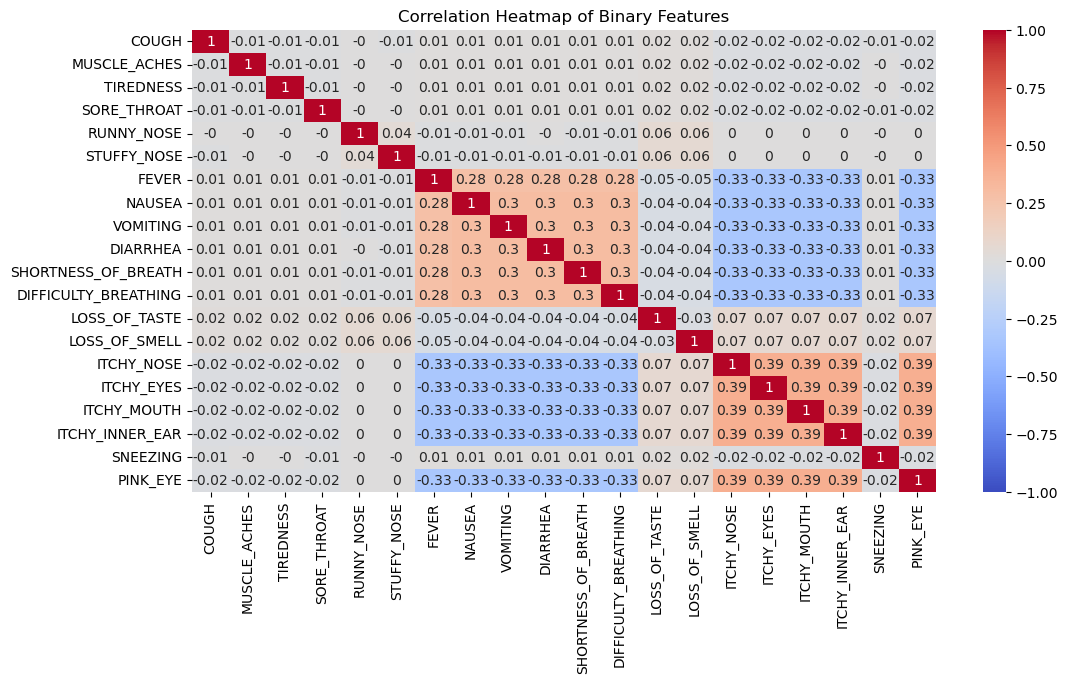

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_covid.iloc[:, :-1].corr().round(2)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Binary Features")
plt.show()

## 6- Feature Importance (Decision Tree)

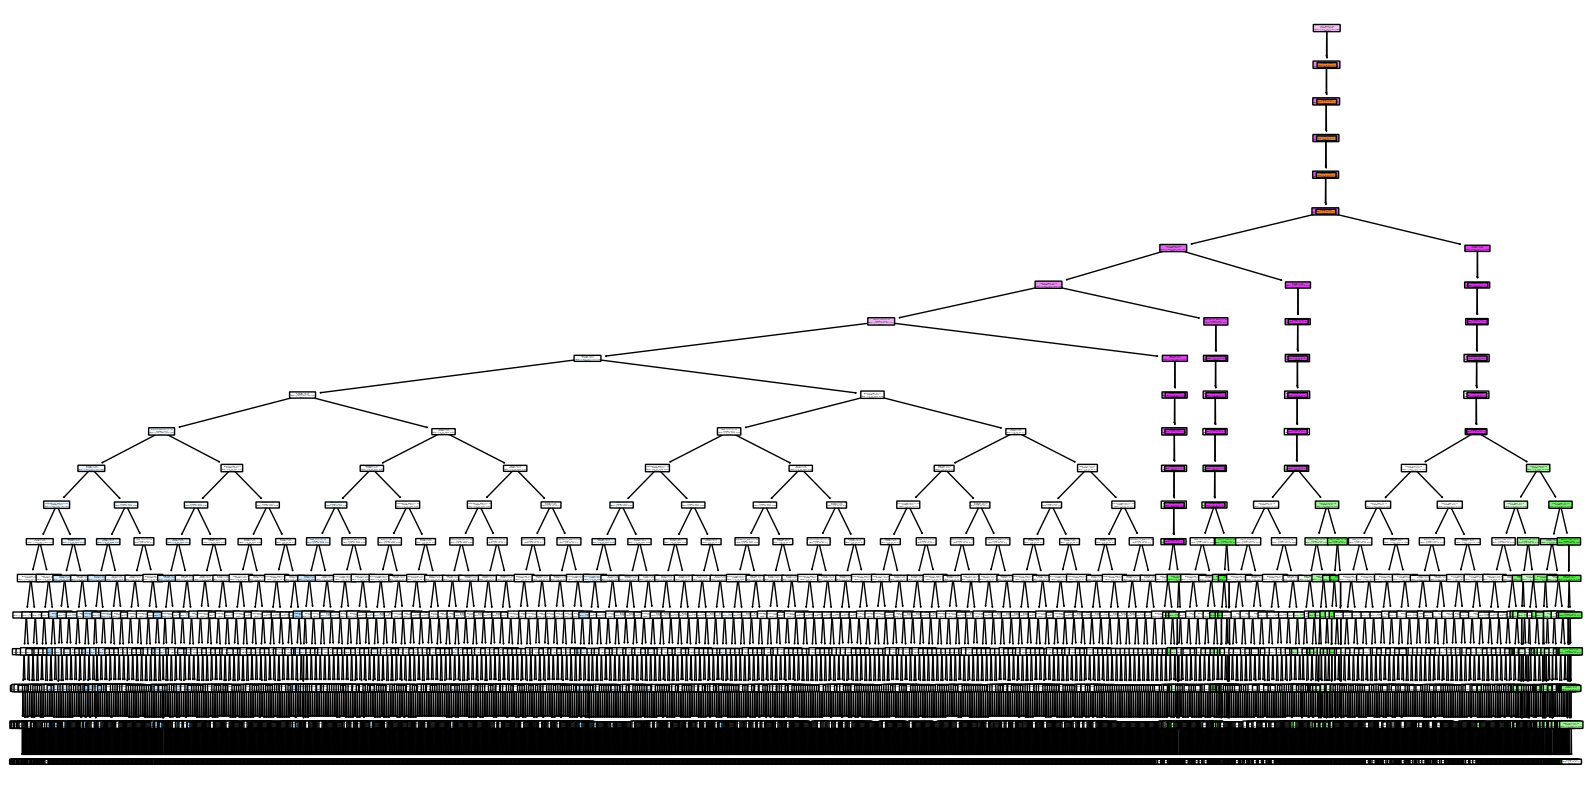

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Load the Data
# data = pd.read_csv("your_dataset.csv")

# Assuming the last column is the target label
X = df_covid.iloc[:, :-1]  # Features
y = df_covid.iloc[:, -1]   # Labels

# Step 2: Encode labels if necessary
# For categorical labels, you may use label encoding if they are not numeric:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Step 3: Build an overfitted Decision Tree
tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
tree.fit(X, y)

# Step 4: Visualize the Tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=[str(c) for c in tree.classes_], 
          proportion=True, rounded=True, impurity=False)
plt.show()

In [6]:
# Step 1: Extract the split feature indices and store them in the order they appear
feature_indices = tree.tree_.feature
feature_names = X.columns

# Step 2: Filter out leaf nodes (-2 indicates a leaf node)
split_feature_indices = feature_indices[feature_indices != -2]

# Step 3: Map the indices to feature names and list their order
split_feature_names = [feature_names[i] for i in split_feature_indices]

# Display the order of features used for splits
print("Order of features used at splits (from root to leaves):")
print(split_feature_names)

# Step 4: Count the usage of each feature in the tree
feature_usage_counts = Counter(split_feature_names)
print("\nFeature usage count:")
print(feature_usage_counts)

Order of features used at splits (from root to leaves):
['ITCHY_NOSE', 'ITCHY_INNER_EAR', 'ITCHY_EYES', 'ITCHY_MOUTH', 'PINK_EYE', 'RUNNY_NOSE', 'STUFFY_NOSE', 'LOSS_OF_SMELL', 'LOSS_OF_TASTE', 'VOMITING', 'DIARRHEA', 'DIFFICULTY_BREATHING', 'NAUSEA', 'SHORTNESS_OF_BREATH', 'FEVER', 'MUSCLE_ACHES', 'TIREDNESS', 'SNEEZING', 'COUGH', 'SORE_THROAT', 'SORE_THROAT', 'SORE_THROAT', 'COUGH', 'COUGH', 'COUGH', 'SORE_THROAT', 'SNEEZING', 'SNEEZING', 'SNEEZING', 'SORE_THROAT', 'SORE_THROAT', 'SNEEZING', 'SORE_THROAT', 'COUGH', 'TIREDNESS', 'TIREDNESS', 'TIREDNESS', 'COUGH', 'COUGH', 'TIREDNESS', 'COUGH', 'SORE_THROAT', 'SORE_THROAT', 'COUGH', 'SORE_THROAT', 'SORE_THROAT', 'SORE_THROAT', 'COUGH', 'TIREDNESS', 'MUSCLE_ACHES', 'SNEEZING', 'SNEEZING', 'MUSCLE_ACHES', 'SNEEZING', 'SNEEZING', 'TIREDNESS', 'SNEEZING', 'MUSCLE_ACHES', 'MUSCLE_ACHES', 'SNEEZING', 'MUSCLE_ACHES', 'MUSCLE_ACHES', 'COUGH', 'SNEEZING', 'TIREDNESS', 'MUSCLE_ACHES', 'MUSCLE_ACHES', 'TIREDNESS', 'MUSCLE_ACHES', 'MUSCLE_ACHES', 

NameError: name 'Counter' is not defined